## 다항 회귀와 과적합 / 과소적합 이해

__< Polynomial Regression 란 ? >__ (p.311 ~  참고) <br>
지금까지 배웠던 내용은 y = ω₀ + ω₁ * x₁ + ω₂ * x₂ + ω₃ * x₃  ..... + ωn * xn 처럼 feature 의 수에 따라 일차방정식 형태로 표현된 회귀 였다. <br>
지금부터는 2차, 3차 방정식과 같은 다항식으로 표현되는 polynomial regression 에 대해 알아보자.<br>
> Polynomial Regression : y =  ω₀ + ω₁ * x₁ + ω₂ * x₂ + ω₃* x₁* x₂+ ω₄* x₁²  ..... 처럼 표현

* 회귀에서 선형 회귀 /  비선형 회귀 를 나누는 기준은 회귀 계수가 선형인지 비선형인지 에 따라 결정 된다. <br> 그렇기 때문에 다항 회귀 ⊂ 선형 회귀  가 성립 한다.<br>


* 임의의 Dataset 가 주어졌을 때, 해당 [그림](https://blog.kakaocdn.net/dn/qMMgx/btqETmbSLix/7y8ZMiSsI2pudtJ1aesetk/img.png)처럼 다항 회귀가 더 예측 성능이 높은 모델이 될 수도 있다.

__< Polynomial Regression with code >__<br><br>
Scikit-learn 에서 다항 회귀를 위한 클래스는 제공되지 않는다.<br>
그래서 비선형 함수를 선형 모델에 적용 시키는 방법을 사용한다. 이를 위해, PolynomialFeature 클래스를 통해 feature 를 polynomial feature 로 변환한다. <br><br>
쉽게 말해, PolynomialFeature 클래스의 degree parameter 에 해당하는 값으로 단항식 → 다항식 feature 로 변환한다.<br>
다른 preprocessing 처럼 fit(), transform() 메서드를 통해 변환 작업을 수행한다. 코드로 보자.<br><br>
해당 코드는 단항값 [x₁, x₂]  를 다항값 [1,x₁, x₂,x₁* x₂, x₁²,  x₂²] 로 변환한다.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 

# 다항식으로 변환할 단항식 생성
X = np.arange(4).reshape(2,2)
print("일차 단항식 계수 피처\n", X,'\n')

# degree = 2  인 2차 다항식으로 변환 
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_change = poly.transform(X)

print('이차 다항식 계수 피처\n',poly_change)

일차 단항식 계수 피처
 [[0 1]
 [2 3]] 

이차 다항식 계수 피처
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


첫 번 째 단항 피처 [x₁= 0, x₂= 1] → 다항 피처 [1,x₁= 0, x₂= 1, x₁* x₂= 0, x₁²= 0, x₂²= 1] <br>
두 번 째 단항 피처 [x₁= 2, x₂= 3] → 다항 피처 [1,x₁= 2, x₂= 3, x₁* x₂= 4, x₁²= 6, x₂²= 9] <br><br>
<span style="color:red">즉, 앞서 LinearRegression 의 fit 에 넣었던 X , 즉 실제 데이터 기반의 X 값 = feature 값들이 다항식 형태로 바뀐 셈 !<br> 
계수 피처가 x₁, x₂,x₁² 등이고 x값으로 들어가는 feature 값들이다. y = ω₀ + ω₁ * x₁를 생각해보자.</span><br>

이렇게 변환 된 polynomial 피처에 LinearRegression 클래스를 적용해 다항 회귀를 구현한다.<br><br>
다음 예제에서는 3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수를 예측 해보자. 

In [13]:
from sklearn.linear_model import LinearRegression

# 피처 값 X 가 들어오면 결정 값 = label 값 y 를 반환 
def polynomial_func(X):
    # 임의 3차 함수 생성
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# 임의로 일차 단항식 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n',X,'\n')
y = polynomial_func(X)

# 단항식을 다항식으로 변환 
poly_change = PolynomialFeatures(degree=3).fit_transform(X)

print('3차 다항식 계수 feature: \n',poly_change,'\n')

# Linear Regression 에 3차 다항식 계수 feature 와 3차 다항식 결정값으로 학습 후 계수 확인 

model = LinearRegression()

model.fit(poly_change,y)

print('회귀 계수: \n',np.round(model.coef_,2))


일차 단항식 계수 feature: 
 [[0 1]
 [2 3]] 

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]] 

회귀 계수: 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


쉽게 말해서, __< 이해를 바탕으로 정리 >__ 를 해보자면 <br>
1. 임의의 3차 다항식 모델 생성.


2. 기본적으로 다항식은 LinearRegression 에 적용을 할 수 없기 때문에 임의로 단항식을 만든 뒤 <br>
   PolynomialFeatures 를 이용해서 원하는 3차 다항식의 일반식을 만들어 낸다. <br>
   여기서 일반식 이라 하면, 해당 차수에 가능한 모든 항 들이 있는 상태를 의미한다.  EX) 2차의 경우에는 6개, 3차의 경우에는 10개 <br>
   
   

3. 일반식으로 만들어진 3차 다항식과 처음에 임의의 생성한 3차 다항식 모델의 <u>회귀 계수</u> 를 비교해 볼 수 있다. 

위 예제로 돌아와서, 3차 다항식으로 변환 이후에는 피처가 10개로 늘어났다. <br>
그리고 10개의 회귀 계수인 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34] 와 <br>
처음 임의로 만든 3차 다항식의 회귀 계수 [1,2,0,3,0,0,0,0,0,4] 와 비교 해 볼 수 있다. <br>
완전히 같지는 않지만 근사하고 있음을 알 수 있다.<br><br>
 
여기까지 LinearRegression 클래스로 polynomial regression 를 구현하는 방법에 대해 알아 보았다. <br><br>
마지막으로, 위 코드를 더 간단하게 만들어주는 [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) 을 사용해보자.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 피처 값 X 가 들어오면 결정 값 = label 값 y 를 반환 
def polynomial_func(X):
    # 임의 3차 함수 생성
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# 임의로 일차 단항식 생성
X = np.arange(4).reshape(2,2)

y = polynomial_func(X)

model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])

model = model.fit(X,y)

print('회귀 계수: \n',np.round(model.named_steps['linear'].coef_,2))

회귀 계수: 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 다항 회귀를 이용한 Underfitting / Overfitting

다항식은 직선적 관계가 아닌 복잡한 다항 관계로 차수가 높아질 수록 더 복잡한 피처 간의 관계까지 모델이 가능하지만, <br>
그럴수록 과적합 문제가 발생 할 가능성이 커진다. <br><br>
[다음 예제](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py) 를 테스트 해보기 전에 간략한 설명을 하자면 <br>
* 원래 dataset 는 feature X 와 label y 가 잡음(Noise) 이 포함된 다항식인 Cosine 그래프 관계가 되도록 만들어준다.
* 이를 기반하여 다항 회귀의 차수를 변화시키면서 회귀 예측 곡선을 만들고 예측 정확도를 비교한다. <br>

[pandas random 모듈](https://nittaku.tistory.com/443)<br>
[numpy linspace ](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)<br>
[matplotlib 공식문서](https://matplotlib.org/index.html) 아래 코드의 subplot, setp 등 찾아서 학습

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline 

# 임의의 값으로 구성된 X 값에 대해 코사인 변환 값 y 를 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

# X는 0 부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터 
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# 코사인 그래프에 x값에 넣은 뒤 랜덤으로 약간의 noise 를 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

이제 위에서 임의로 만든 X 값으로 단항식을 만들어서 PolynomialFeatures 로 차수를 1,4,15 로 변경하면서 예측 결과를 비교해보자. <br><br>
cross_val_score 로 MSE 값을 이용하여 검증을 통한 학습 데이터의 예측 성능을 평가 할 것이고, <br>테스트 데이터를 통한 <u>예측 곡선</u>과 앞선 코사인 그래프 ( = <u>실제 곡선</u> )를 동시에 시각화해서 비교 해보자.


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다

Degree 15 회귀 계수는 [-2.98294000e+03  1.03899850e+05 -1.87416981e+06  2.03717199e+07
 -1.44874017e+08  7.09319141e+08 -2.47067173e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920643e+09 -1.70382078e+08] 입니다.
Degree 15 MSE 는 182581084.83 입니다


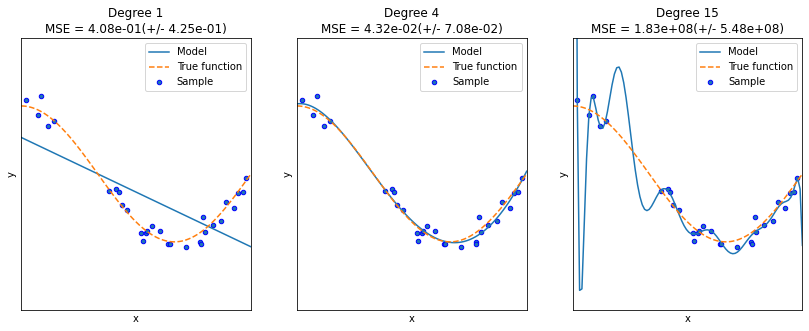

In [13]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

for i in range(len(degrees)):
    
    # 여러 개의 plot을 동시에 시각화 할 때 subplot 사용 
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())
    
    # 개별 degree 별 polynomial 로 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear_regression = LinearRegression()
    
    pipeline = Pipeline([('polynomial_features',polynomial_features),('linear_regression',linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    
    # 교차 검증으로 다항 회귀를 평가 
    scores = cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)
    
    # Pipline 의 named_steps attributes 를 이용해서 객체 세부사항에 접근 
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i],np.round(coefficients,2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다'.format(degrees[i],-1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행 
    X_test = np.linspace(0,1,100)
    
    # 예측값 곡선 
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label='Model')
    
    # 실제값 곡선 
    plt.plot(X_test,true_fun(X_test),'--',label='True function')
    plt.scatter(X,y,edgecolors='b',s=20,label='Sample')
    
    plt.xlabel('x'); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i],-scores.mean(),scores.std()))

plt.show()    
    

### 정리
 * 실선으로 표현된 예측 곡선은 다항 회귀 예측 곡선 
 * 점선으로 표현된 곡선은 실제 데이터 세트에 약간의 잡음이 추가된 코사인 곡선 
 * 점으로 표현된 것은 실제 데이터 세트 ( = 학습 데이터 ) 
 
 
 * Degree 1 의 경우 실제 데이터 세트를 단순 직선으로 예측하기에는 부정확하기 때문에 __과소적합 모델__
 * Degree 4 의 경우 실제 데이터 세트와 유사한 모습. 변동하는 잡음까지 완벽하게는 예측하지는 못했으나 학습 데이터 세트가 비교적 잘 반영되었기 때문에 가장 뛰어난 예측 성능을 갖는 __균형 잡힌 모델__
 * Degree 15 의 경우 예측 곡선의 MSE 값이 터무니 없이 큰 오류값이 발생. 잡음 값까지 지나치게 반영하였고 학습 데이터 (scatter)만 정확히 예측하고 테스트 값의 실제 곡선과는 전혀 다른 형태의 예측 곡선이 만들어 졌기 때문에 __과적합 모델__ ( 학습 데이터에 치중된 경향 확인 가능 )<br>지나치게 모든 데이터에 적합한 회귀식을 만들기 위해 회귀 계수가 매우 크게 설정 되면서 형편 없는 예측 성능을 보임.

## 편향 - 분산 트레이드 오프 ( Bias - Variance Trade off ) 

Degree 1 처럼 매우 단순화된 모델로 지나치게 한 방향성으로 치우진 경향을 가진 모델은 __고편향 (High Bias)__ 성을 가졌다고 표현한다.<br>
Degree 15 처럼 매우 복잡한 모델로 지나치게 높은 변동성을 가진 모델은 __고분산 (High Variance)__ 성을 가졌다고 표현한다.<br><br>
해당 [그림](https://t1.daumcdn.net/cfile/tistory/99CDCC33599AC28F07)을 확인해보자. 참고로 <u>실제 결과 = 과녁판 / 예측 결과 = 맞춘 위치 </u><br>
* Low Bias / Low variance : 예측 결과가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 특정 부분에 집중돼 있는 상태 ( 성능 좋음 ) 
* Low Bias / High variance : 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 넓게 분포 되어 있는 상태 
* High Bias / Low variance : 예측 결과가 실제 결과에 벗어나지만 특정 부분에 집중돼 있는 상태 
* High Bias / High variance : 예측 결과가 실제 결과에 벗어나면서도 넓게 분포 되어 있는 상태 

일반적으로 Bias 과 Variance 는 [반비례 관계](https://t1.daumcdn.net/cfile/tistory/996DB433599AC34225) 에 있다. <br>
Bias ↑ 이면 Variance ↓ = underfitting = ex) Degree 1 <br>
Variance ↑ 이면 Bias ↓ = overfitting  = ex) Degree 15

즉, bias 와 variance 가 서로 트레이드 오프를 이루면서 오류 값 ( cost function 의 cost 값 = 실제 값 - 예측 값  )이 최대로 낮아지는 모델을 구축하는 것이<br> 머신러닝 예측 모델을 만들 때 중요하다 !!!<br>  
